In [1]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.base import clone
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# RUN MODELS

### This notebook serves as a one stop shop for our models. Get all evaluation metrics in one place. 

# Model Creation

Current Regression Models: XGBoost and RandomForestRegressor
Past Regression Models: LinearRegression, KNN,

In [2]:
data = pd.read_csv("../data/CleanData/fullData.csv")

In [3]:
data = data[["YEAR FORECAST MADE",'YEAR BEING FORECAST',"FORECASTER_CONF", 'INDICATOR', 'actual', 'pred_average', 'pred_var', 'banana', 'beef', 'bread', 'chicken','eggs', 'electricity', 'flour', 'iceCream','unleadedGasoline']].dropna()

In [4]:
train = data[data["YEAR BEING FORECAST"]<2017]
train

,YEAR FORECAST MADE,YEAR BEING FORECAST,FORECASTER_CONF,INDICATOR,actual,pred_average,pred_var,banana,beef,bread,chicken,eggs,electricity,flour,iceCream,unleadedGasoline
0,1992,1992,0.239610,RealGDP,3.52244,1.000,0.250000,0.479333,1.577667,0.734333,0.862,0.888000,0.085000,0.241333,2.605000,1.061667
1,1992,1992,0.267857,RealGDP,3.52244,3.300,0.360000,0.479333,1.577667,0.734333,0.862,0.888000,0.085000,0.241333,2.605000,1.061667
2,1992,1992,0.212500,RealGDP,3.52244,2.100,1.240000,0.479333,1.577667,0.734333,0.862,0.888000,0.085000,0.241333,2.605000,1.061667
4,1992,1992,0.290714,RealGDP,3.52244,1.150,0.427500,0.479333,1.577667,0.734333,0.862,0.888000,0.085000,0.241333,2.605000,1.061667
5,1992,1992,0.196250,RealGDP,3.52244,1.500,0.800000,0.479333,1.577667,0.734333,0.862,0.888000,0.085000,0.241333,2.605000,1.061667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22497,2016,2016,0.271193,Unemployment,4.87500,4.780,0.185350,0.573000,3.611667,1.355667,1.481,1.364667,0.132667,0.511000,4.669667,2.220000
22498,2016,2016,0.324173,Unemployment,4.87500,4.725,0.118125,0.573000,3.611667,1.355667,1.481,1.364667,0.132667,0.511000,4.669667,2.220000
22499,2016,2016,0.288279,Unemployment,4.87500,4.650,0.090000,0.573000,3.611667,1.355667,1.481,1.364667,0.132667,0.511000,4.669667,2.220000
22500,2016,2016,0.437339,Unemployment,4.87500,4.500,0.000000,0.573000,3.611667,1.355667,1.481,1.364667,0.132667,0.511000,4.669667,2.220000


In [5]:
val = data[(data["YEAR BEING FORECAST"]==2017)|(data["YEAR BEING FORECAST"]==2018)]
val

,YEAR FORECAST MADE,YEAR BEING FORECAST,FORECASTER_CONF,INDICATOR,actual,pred_average,pred_var,banana,beef,bread,chicken,eggs,electricity,flour,iceCream,unleadedGasoline
17216,2014,2017,0.326356,RealGDP,2.255680,2.450,0.147500,0.597000,3.573333,1.370667,1.525667,2.022333,0.134333,0.549667,4.947667,3.405333
17219,2014,2017,0.288582,RealGDP,2.255680,3.150,2.327500,0.597000,3.573333,1.370667,1.525667,2.022333,0.134333,0.549667,4.947667,3.405333
17222,2014,2017,0.259792,RealGDP,2.255680,2.200,2.410000,0.597000,3.573333,1.370667,1.525667,2.022333,0.134333,0.549667,4.947667,3.405333
17223,2014,2017,0.261585,RealGDP,2.255680,2.600,0.390000,0.597000,3.573333,1.370667,1.525667,2.022333,0.134333,0.549667,4.947667,3.405333
17225,2014,2017,0.335406,RealGDP,2.255680,3.000,0.450000,0.597000,3.573333,1.370667,1.525667,2.022333,0.134333,0.549667,4.947667,3.405333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26209,2018,2018,0.437339,Unemployment,3.891667,3.500,0.000000,0.572333,3.740000,1.280333,1.470333,1.617000,0.135000,0.441000,4.820667,2.657333
26210,2018,2018,0.568462,Unemployment,3.891667,3.650,0.127500,0.572333,3.740000,1.280333,1.470333,1.617000,0.135000,0.441000,4.820667,2.657333
26211,2018,2018,0.306512,Unemployment,3.891667,3.500,0.000000,0.572333,3.740000,1.280333,1.470333,1.617000,0.135000,0.441000,4.820667,2.657333
26212,2018,2018,0.334783,Unemployment,3.891667,3.600,0.090000,0.572333,3.740000,1.280333,1.470333,1.617000,0.135000,0.441000,4.820667,2.657333


In [6]:
test = data[data["YEAR BEING FORECAST"]==2019]
test

,YEAR FORECAST MADE,YEAR BEING FORECAST,FORECASTER_CONF,INDICATOR,actual,pred_average,pred_var,banana,beef,bread,chicken,eggs,electricity,flour,iceCream,unleadedGasoline
21270,2016,2019,0.288582,RealGDP,2.288870,2.1500,2.327500,0.580,3.965667,1.416000,1.456667,2.225333,0.134,0.518667,4.871333,1.897333
21271,2016,2019,0.257202,RealGDP,2.288870,1.9750,2.869375,0.580,3.965667,1.416000,1.456667,2.225333,0.134,0.518667,4.871333,1.897333
21273,2016,2019,0.259792,RealGDP,2.288870,1.7000,2.860000,0.580,3.965667,1.416000,1.456667,2.225333,0.134,0.518667,4.871333,1.897333
21274,2016,2019,0.335406,RealGDP,2.288870,2.1500,0.427500,0.580,3.965667,1.416000,1.456667,2.225333,0.134,0.518667,4.871333,1.897333
21277,2016,2019,0.256955,RealGDP,2.288870,2.2600,1.862400,0.580,3.965667,1.416000,1.456667,2.225333,0.134,0.518667,4.871333,1.897333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,2019,2019,0.568462,Unemployment,3.683333,3.5500,0.047500,0.573,3.838333,1.349667,1.472667,1.407333,0.134,0.426000,4.871667,2.626667
28018,2019,2019,0.306512,Unemployment,3.683333,3.5410,0.039319,0.573,3.838333,1.349667,1.472667,1.407333,0.134,0.426000,4.871667,2.626667
28019,2019,2019,0.292911,Unemployment,3.683333,3.6281,0.111690,0.573,3.838333,1.349667,1.472667,1.407333,0.134,0.426000,4.871667,2.626667
28020,2019,2019,0.207143,Unemployment,3.683333,3.6000,0.090000,0.573,3.838333,1.349667,1.472667,1.407333,0.134,0.426000,4.871667,2.626667


In [ ]:
# train=pd.read_csv("../data/TrainingData/train.csv")
# test=pd.read_csv("../data/TestData/test.csv")
# val=pd.read_csv("../data/ValidationData/val.csv")

In [7]:
predict = pd.read_csv("../data/PredictionData/predict_set.csv")
predict["actual"] = ["Unknown" for i in np.arange(len(predict["actual"]))]
predict.dropna(inplace=True)
predict

,YEAR FORECAST MADE,YEAR BEING FORECAST,FORECASTER_CONF,INDICATOR,actual,pred_average,pred_var,banana,beef,bread,chicken,eggs,electricity,flour,iceCream,unleadedGasoline
1,2017,2020,0.288582,RealGDP,Unknown,1.9500,1.947500,0.572333,3.568000,1.346000,1.451000,1.489,0.134333,0.529000,4.818333,2.324333
6,2017,2020,0.335406,RealGDP,Unknown,0.9000,0.840000,0.572333,3.568000,1.346000,1.451000,1.489,0.134333,0.529000,4.818333,2.324333
7,2017,2020,0.279251,RealGDP,Unknown,2.2300,0.977100,0.572333,3.568000,1.346000,1.451000,1.489,0.134333,0.529000,4.818333,2.324333
9,2017,2020,0.306127,RealGDP,Unknown,1.7300,1.897100,0.572333,3.568000,1.346000,1.451000,1.489,0.134333,0.529000,4.818333,2.324333
11,2017,2020,0.256955,RealGDP,Unknown,3.0700,1.425100,0.572333,3.568000,1.346000,1.451000,1.489,0.134333,0.529000,4.818333,2.324333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,2021,2024,0.324173,Unemployment,Unknown,5.2650,0.514775,0.599667,4.184667,1.510333,1.491667,1.629,0.140333,0.410667,4.849667,2.988333
4825,2021,2024,0.288279,Unemployment,Unknown,5.1875,0.199219,0.599667,4.184667,1.510333,1.491667,1.629,0.140333,0.410667,4.849667,2.988333
4828,2021,2024,0.306512,Unemployment,Unknown,5.5140,0.578179,0.599667,4.184667,1.510333,1.491667,1.629,0.140333,0.410667,4.849667,2.988333
4830,2021,2024,0.207143,Unemployment,Unknown,5.1250,0.203125,0.599667,4.184667,1.510333,1.491667,1.629,0.140333,0.410667,4.849667,2.988333


In [8]:
def MeasureSplit(df,measure):
    return df[df["INDICATOR"]==measure].drop(columns = ["actual","INDICATOR","YEAR BEING FORECAST","YEAR FORECAST MADE"]),df[df["INDICATOR"]==measure]["actual"]

In [9]:
class RegressionModel:
    measures = ["Unemployment","RealGDP","Core CPI","Core PCE"]
    RF_params = {"n_estimators":np.arange(100,300,20)}
    Xgboost_params = {'max_depth':np.arange(2,10),'n_estimators': np.arange(60,200,40),"learning_rate":[0.01,0.05,0.1]}
    def __init__(self,name,model,optimize=False):
        self.years = None
        self.name = name
        self.model = model
        self.fitted_models = dict.fromkeys(self.measures,None)
        self.best_models = dict.fromkeys(self.measures,None)
        
        self.rmse_scores = []
        self.optimized_rmse_scores = []
        self.test_rmse_scores = []
        
        self.optimized_r2_scores = []
        self.r2_scores = []
        self.test_r2_scores = []
        
        self.optimized=False
        
        self.train_models()
        if optimize:
            if str(type(self.model))=="<class 'sklearn.ensemble._forest.RandomForestRegressor'>":
                self.perform_gridsearch(self.RF_params)
            elif str(type(self.model)) == "<class 'xgboost.sklearn.XGBRegressor'>":
                self.perform_gridsearch(self.Xgboost_params)
        
    def train_models(self):
        for measure in self.measures:
            X_train,y_train = MeasureSplit(train,measure)
            model = clone(self.model)
            model.fit(X_train,y_train)
            self.fitted_models[measure] = model
        self.store_scores("Initial")  
        return print("initial models fitted")    
        
    def store_scores(self,score_type,dataset=val):
        self.clear_scores(score_type)
        rmse,r2 = self.get_score_type(score_type)
        models = self.get_model_type(score_type)
        for measure in self.measures:
            X_test,y_test = MeasureSplit(dataset,measure)
            predictions = self.get_predictions(models[measure],measure,dataset) 
            rmse.append(np.sqrt(np.mean((y_test-predictions)**2)))
            r2.append(r2_score(y_test,predictions))
        return 
    
    def clear_scores(self,score_type):
        rmse,r2 = self.get_score_type(score_type)
        rmse = []
        r2 = []
    
    def get_predictions(self,model,variable_name,dataset=val):
        assert variable_name in self.measures
        #returns predictions for specified measure
        X_test,y_test = MeasureSplit(dataset,variable_name)
        return model.predict(X_test)
    
    def get_score_type(self,score_type):
        if score_type=="Initial":
            rmse = self.rmse_scores
            r2 = self.r2_scores
        elif score_type == "Optimized":
            rmse = self.optimized_rmse_scores
            r2 = self.optimized_r2_scores
        elif score_type == "Test":
            rmse = self.test_rmse_scores
            r2 = self.test_r2_scores
        else: 
            print("Choose valid score type.")
        return rmse,r2
    
    def get_model_type(self,model_type):
        if model_type=="Initial":
            models = self.fitted_models
        elif model_type == "Optimized":
            models = self.best_models
        elif model_type == "Test":
            if self.optimized:
                models = self.best_models
            else:
                models = self.fitted_models
        else: 
            print("Choose valid model type.")
        return models
    
    def plot_scores(self,score_type):
        rmse,r2 = self.get_score_type(score_type)
        fig,axes = plt.subplots(2,1,figsize=(10,20))
        for i,score,s in zip([0,1],['RMSE Scores','R^2 Scores'],[rmse,r2]):
            sns.barplot(x=self.measures,y=s,ax=axes[i])
            axes[i].set_title(score)
            axes[i].set_xlabel("Economic Measures")
            axes[i].set_ylabel("Score")
            axes[i].tick_params(axis='x', labelsize= 20)
            axes[i].tick_params(axis='y', labelsize= 20)
        return plt.show()
            
    def run_test(self):
        self.store_scores("Test",test)
        return
    
   
    
    def annual_performance(self, model_type, variable_name,dataset=val, plot=True,tick=True):
        assert variable_name in self.measures
        model = self.get_model_type(model_type)[variable_name]
        preds = self.get_predictions(model,variable_name,dataset)
        actuals = dataset[dataset["INDICATOR"]==variable_name]['actual']
        spf_preds = dataset[dataset["INDICATOR"]==variable_name]['pred_average']
        years = dataset[dataset["INDICATOR"]==variable_name]['YEAR BEING FORECAST']
        frame = pd.DataFrame({"Actual": actuals, "SPF": spf_preds, "Model": preds, "Year": years})
        grouped = frame.groupby("Year").mean()
        self.years = years
        if plot == True:
            fig,ax = plt.subplots(1,1,figsize=(25,10))
            #plt.title("Historical Model Performance predicting "+variable_name,size=30)
            
            plt.plot(grouped['Actual'],linewidth=4)
            plt.plot(grouped['SPF'],linewidth=4)
            plt.plot(grouped['Model'],linewidth=4)
            labels = ["Actual", "SPF", "Model"]
            #plt.xlabel("Year",size=30)
            #plt.ylabel("Percent Change", size=30)
            if not tick:
                ax.set_yticklabels([])
                ax.set_xticklabels([])
                plt.xlabel("")
                plt.ylabel("")
#             plt.legend(labels,loc="lower left",prop={'size': 30})
#             ax.tick_params(axis='both', which='major', labelsize=30)
#             ax.tick_params(axis='both', which='minor', labelsize=30)
            plt.show()
            
        return grouped
    
    def perform_gridsearch(self,parameters):
        
        def find_optimal_model(variable_name):
            X_train,y_train = MeasureSplit(train,variable_name)
            gridsearch = GridSearchCV(estimator=self.model,param_grid = parameters,scoring='neg_root_mean_squared_error',n_jobs=5,cv=5,verbose=True)
            gridsearch.fit(X_train,y_train)
            return gridsearch.best_estimator_
        
        for measure in self.measures:    
            self.best_models[measure]=find_optimal_model(measure)
        self.optimized=True
        self.store_scores("Optimized")
        return
    
    def get_feature_importance(self,model_type,variable_name):
        assert variable_name in self.measures
        X_train,y_train = MeasureSplit(train,variable_name)
        model= self.get_model_type(model_type)[variable_name].fit(X_train,y_train)
        fig,axs = plt.subplots(1,1,figsize=(25,10))
        sorted_scores = model.feature_importances_.argsort()
        sns.barplot(x=X_train.columns[sorted_scores],y=model.feature_importances_[sorted_scores])
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.title("Feature Importance for "+self.name + " predicting: "+variable_name ,size=30);
    def create_results(self,model_type,dataset=val):
        models = self.get_model_type(model_type)
        data = {}
        for measure in self.measures:
            data[measure] = self.get_predictions(models[measure],measure,dataset)
        return pd.DataFrame(dict([ (self.name+" "+k,pd.Series(v)) for k,v in data.items()]))
    
    def future_predictions(self,model_type,variable_name):
        new_predictions = self.get_predictions(self.get_model_type(model_type)[variable_name],variable_name,predict)
        frame = pd.DataFrame({ variable_name+" Prediction": new_predictions, "Year": predict[predict["INDICATOR"]==variable_name]["YEAR BEING FORECAST"]})
        grouped = frame.groupby("Year").mean()
        return grouped


In [10]:
rf = RegressionModel("RandomForest", RandomForestRegressor())

initial models fitted


In [11]:
rf.rmse_scores

[0.8298442692707588,
 1.0804971575540865,
 0.325382293165857,
 0.24105594109002232]

In [12]:
rf.run_test()

In [13]:
rf.test_rmse_scores

[1.2144823285180468,
 0.8503923674585687,
 0.2738140041297122,
 0.16756960035312718]

In [14]:
rf.test_r2_scores

[-7.478972865916678e+30, -3.6668932322317714e+30, -9.504097409484489e+28, 0.0]

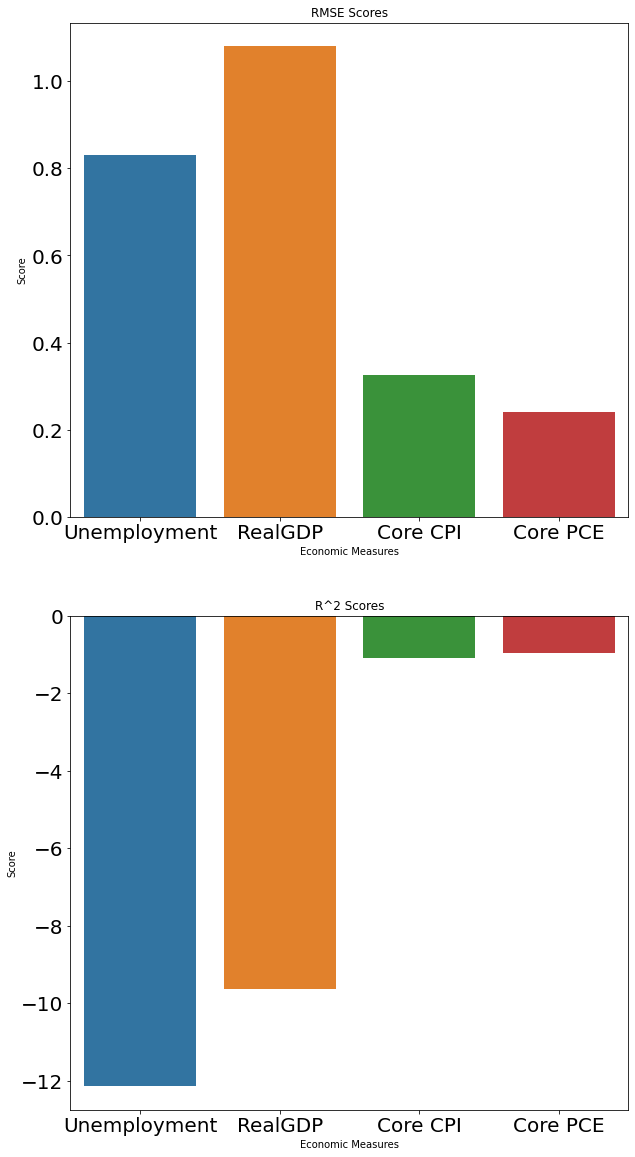

In [15]:
rf.plot_scores("Initial")

In [ ]:
rf.plot_scores("Optimized")

In [ ]:
rf.future_predictions("Initial","RealGDP")

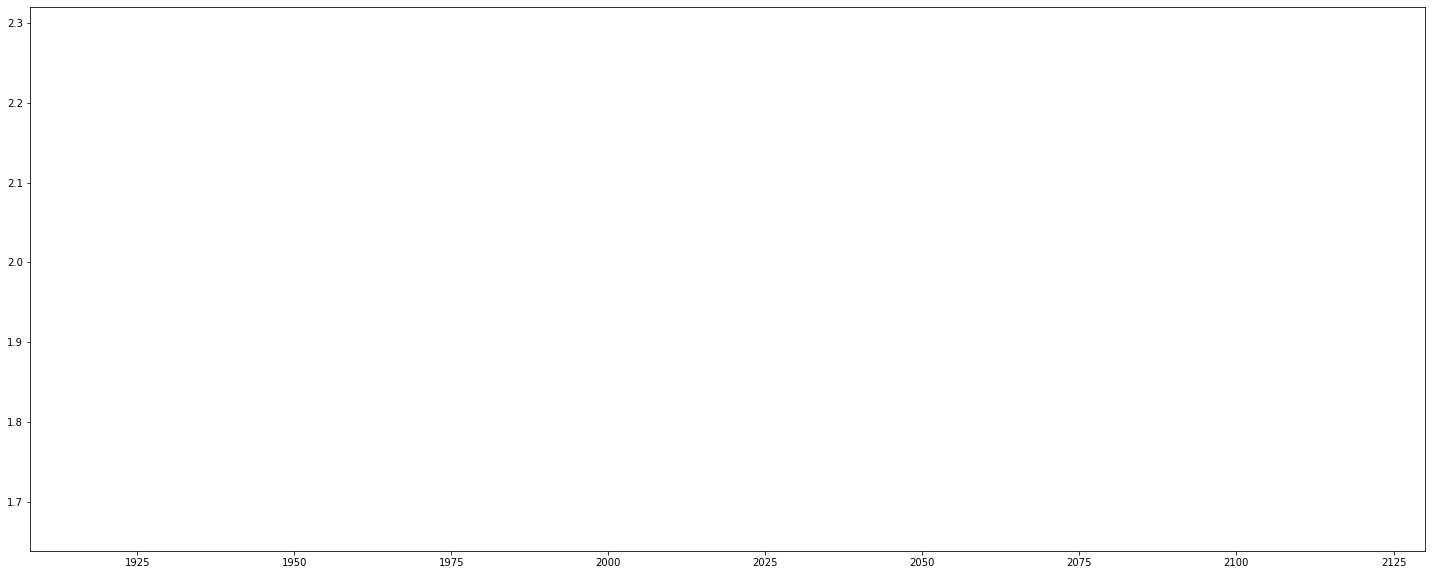

,Actual,SPF,Model
Year,,,
2019,2.28887,2.201468,1.669524


In [21]:
rf.annual_performance("Initial","RealGDP",test)

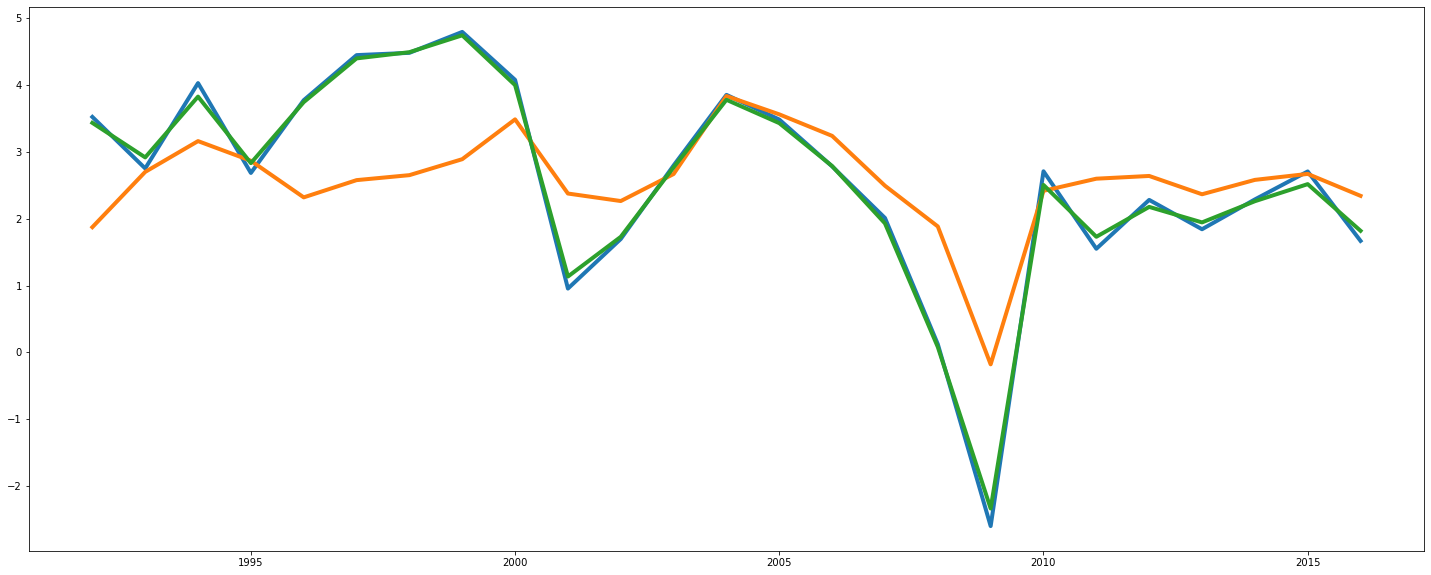

,Actual,SPF,Model
Year,,,
1992,3.52244,1.872952,3.433556
1993,2.75179,2.699792,2.916937
1994,4.02879,3.160654,3.826386
1995,2.68421,2.866563,2.831179
1996,3.77257,2.318897,3.743796
1997,4.44717,2.576589,4.398078
1998,4.48139,2.651217,4.491223
1999,4.79450,2.890070,4.743526
2000,4.07716,3.485800,3.998001


In [19]:
rf.annual_performance("Initial","RealGDP",train)

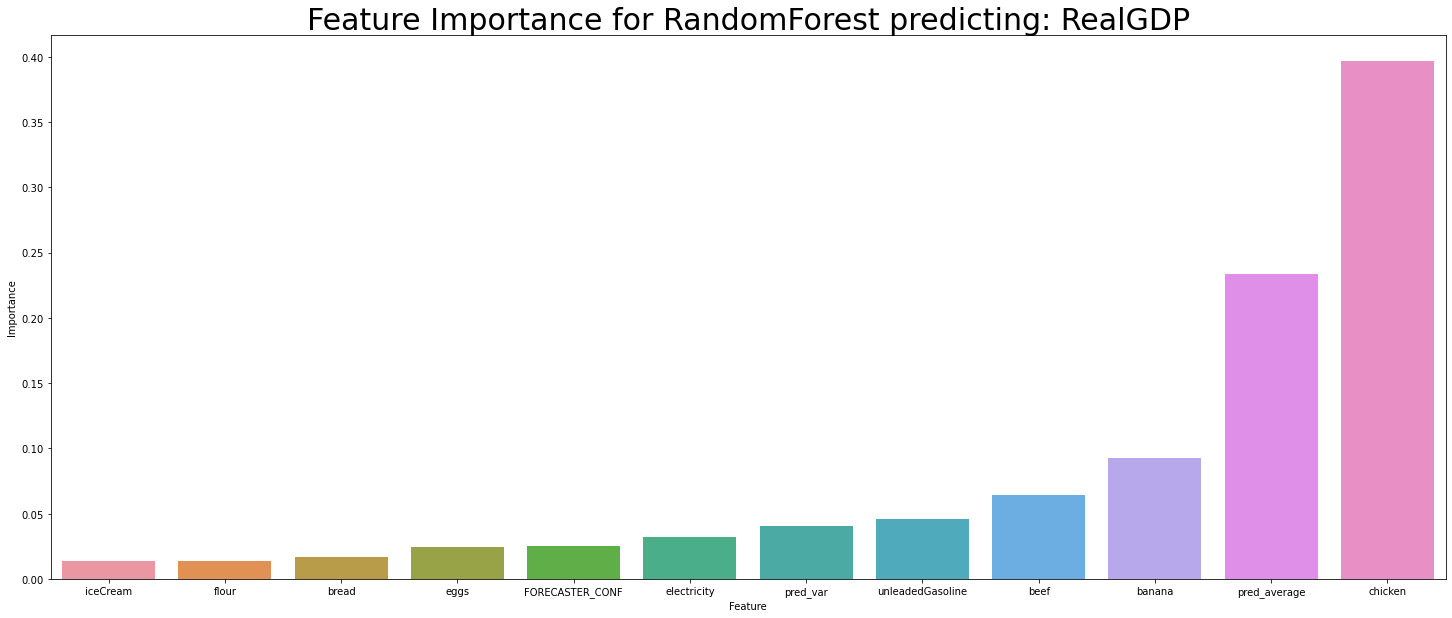

In [20]:
rf.get_feature_importance("Initial","RealGDP")

In [ ]:
rf.annual_performance("Initial","RealGDP")

In [ ]:
predict[(predict["INDICATOR"]=="RealGDP")&(predict["YEAR BEING FORECAST"]==2021)].groupby("YEAR FORECAST MADE").mean()

In [ ]:
rf.plot_scores("Initial")

In [ ]:
rf_results = rf.create_results("Optimized")

In [ ]:
xgb = RegressionModel("XGBoost",XGBRegressor())

In [ ]:
xgb.plot_scores("Initial")

In [ ]:
xgboost.best_models = {'Unemployment': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0),
 'RealGDP': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0),
 'Core CPI': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=140, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0),
 'Core PCE': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)}

In [ ]:
xgb.annual_performance("Optimized","RealGDP")

In [ ]:
xg_scores = xgb.create_results("Optimized")

In [ ]:
rf_test_results = rf.create_results("Optimized",test)

In [ ]:
xg_test_results = xgb.create_results("Optimized",test)

In [ ]:
rf_predict_results = rf.create_results("Optimized",predict)

In [ ]:
xg_predict_results = xgb.create_results("Optimized",predict)

In [ ]:
predict_model_predictions = pd.concat([xg_predict_results,rf_predict_results],axis=1)

In [ ]:
test_model_predictions = pd.concat([xg_test_results,rf_test_results],axis=1)

In [ ]:
model_predictions = pd.concat([xg_scores,rf_results],axis=1)#,lm_scores,neighbor_scores],axis=1)

In [ ]:
model_predictions

In [ ]:
def create_final(df,results_df):
    t = df.loc[:,["INDICATOR","actual"]]
    initial = pd.DataFrame([])
    for measure in RegressionModel.measures:
        temp = t[t["INDICATOR"]==measure]
        temp.rename(columns={"actual":measure + " actual","INDICATOR":measure},inplace=True)
        temp.reset_index(inplace=True)
        initial = pd.concat([initial,temp],axis=1)
    initial.drop(columns = ['index'],inplace = True)
    return pd.concat([initial,results_df],axis=1)


In [ ]:
val_performance = create_final(val,model_predictions)
val_performance.to_csv("../data/ValidationData/Ensemble_inputs_val.csv",index=False)

In [ ]:
test_performance = create_final(test,test_model_predictions)
test_performance.to_csv("../data/TestData/Ensemble_inputs_test.csv",index=False)

In [ ]:
predict_performance=create_final(predict,predict_model_predictions)
predict_performance.to_csv("../data/PredictionData/Ensemble_inputs_predict.csv",index=False)

In [ ]:
def spf_rmse(variable_name,model,dataset=test,tick=True):
    fig,axs = plt.subplots(figsize=(20,10))
    preds = model.get_predictions(model.get_model_type("Initial")[variable_name],variable_name,dataset)
    spf_diff = dataset[dataset["INDICATOR"]==variable_name]["actual"] - dataset[dataset["INDICATOR"]==variable_name]["pred_average"]
    diff = dataset[dataset["INDICATOR"]==variable_name]["actual"] - preds
    sns.histplot(diff,ax = axs,color="green",kde=True,element="step")
    sns.histplot(spf_diff,ax=axs,color="orange",kde=True,element="step")
    if not tick:
        axs.set_yticklabels([])
        axs.set_xticklabels([])
        plt.xlabel("")
        plt.ylabel("")
    plt.show()
    return 

In [ ]:
spf_rmse("RealGDP",rf)